In [1]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

print(x_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [7]:
print(f"matrix x_train contian {x_train.shape} and type {type(x_train)}")
print(f"x_train :  {x_train}")
print(f"matrix x_train contian {y_train.shape} and type {type(y_train)}")
print(f"y_train :  {y_train}")

matrix x_train contian (3, 4) and type <class 'numpy.ndarray'>
x_train :  [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
matrix x_train contian (3,) and type <class 'numpy.ndarray'>
y_train :  [460 232 178]


In [8]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Model prediction with multiple feature 

In [9]:
# prediction without vectorization
def model_single_loop(x,w,b):
    
    n=x.shape[0]
    f_wb=0
    
    for i in range(n):
        f_wb= f_wb + w[i] *x[i]
    
    
    
    t_f_wb= f_wb + b
    return t_f_wb
    
    

In [10]:
print(model_single_loop(x_train,w_init,b_init))

[-17299.1111338     736.67846672    769.71968244   -314.6694346 ]


In [11]:
# get row from our training data set
x_vec=x_train[0,:]
print(x_vec)
print(x_train[1,:])
print(x_train[2,:])
print(x_train[0,1:3])

[2104    5    1   45]
[1416    3    2   40]
[852   2   1  35]
[5 1]


In [12]:
predict=model_single_loop(x_vec,w_init,b_init)
print(f"the prediction of first row of training example is {predict}")

the prediction of first row of training example is 459.9999976194083


### Prediction with vectorization

In [13]:
def model_with_vectorization(x,w_init,b_init):
    n=x.shape[0]
    
    f_wb=np.dot(x,w_init) + b_init
    return f_wb
    
    

In [14]:
print(f"prediction with vectorization {model_with_vectorization(x_train,w_init,b_init)}")

prediction with vectorization [459.99999762 231.99999837 177.99999899]


In [39]:
# compute cost function with multiple variable
def cost_with_multivariable(x,y,w_init,b_init,model_with_vectorization):
    
    m=x.shape[0]
    sum_cost=0
    f_wb=model_with_vectorization(x,w_init,b_init)
    
    for i in range(m):
        
        sum_cost +=(f_wb[i] - y[i])**2
        
    total_cost=1/(2*m) * sum_cost
    
    return total_cost 
        
    
    

In [40]:
cost= cost_with_multivariable(x_train,y_train,w_init,b_init,model_with_vectorization)
print(cost)

1.5578904330213735e-12


In [47]:
# gradient descent with multiple variable

def gradient_desent_multivariable(x,y,w_init,b_init,alpha,num_iterates,cost_with_multivariable,model_with_vectorization):
    
    w = w_init
    b = b_init
    
    
    m = x.shape[0]
    J_cost=[]
    def gradient(f_wb,x,y,w,b):
        f_wb = model_with_vectorization(x,w,b)

        dj_dw=0
        dj_db=0
        m=x.shape[0]
        
        for i in range(m):
            dj_dw_i = (f_wb[i]- y[i]) *x[i]
            dj_dw = dj_dw + dj_dw_i
            dj_db_i  = (f_wb[i] - y[i])
            dj_db = dj_db + dj_db_i


        dj_dw = dj_dw / m
        dj_db = dj_db / m
        
        return dj_dw,dj_db
    
    
    for i in range(num_iterates):
        dj_dw,dj_db = gradient(model_with_vectorization,x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<1000:
            J_cost.append(cost_with_multivariable(x,y,w,b,model_with_vectorization))
    
        
        
    return w,b,J_cost
        
    
    
    
    
    
    
    
    
    
    
    
    

In [48]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7

In [49]:
final_w, final_b,cost_hist = gradient_desent_multivariable(x_train,y_train,initial_w,initial_b,alpha,iterations,cost_with_multivariable,model_with_vectorization)

In [50]:
print(final_w)
print(final_b)
print(cost_hist)

[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
-0.0022354075309325345
[2529.46295223163, 765.8336829952987, 699.6290280210451, 697.1337425623088, 697.0296591788103, 697.015325600664, 697.0043615139081, 696.9935248096682, 696.9826938019233, 696.9718639233552, 696.9610350024591, 696.9502070327162, 696.9393800137987, 696.9285539456151, 696.9177288280791, 696.9069046611058, 696.8960814446137, 696.8852591785145, 696.8744378627266, 696.8636174971623, 696.8527980817419, 696.8419796163763, 696.8311621009817, 696.8203455354767, 696.8095299197741, 696.7987152537901, 696.7879015374383, 696.777088770639, 696.7662769533032, 696.755466085348, 696.7446561666907, 696.733847197246, 696.7230391769276, 696.712232105652, 696.701425983336, 696.6906208098927, 696.6798165852422, 696.6690133092945, 696.6582109819703, 696.6474096031818, 696.636609172847, 696.6258096908782, 696.6150111571967, 696.6042135717119, 696.5934169343415, 696.5826212450049, 696.5718265036146, 696.5610327100835, 696.5502398643339, 696

###  plot cost history

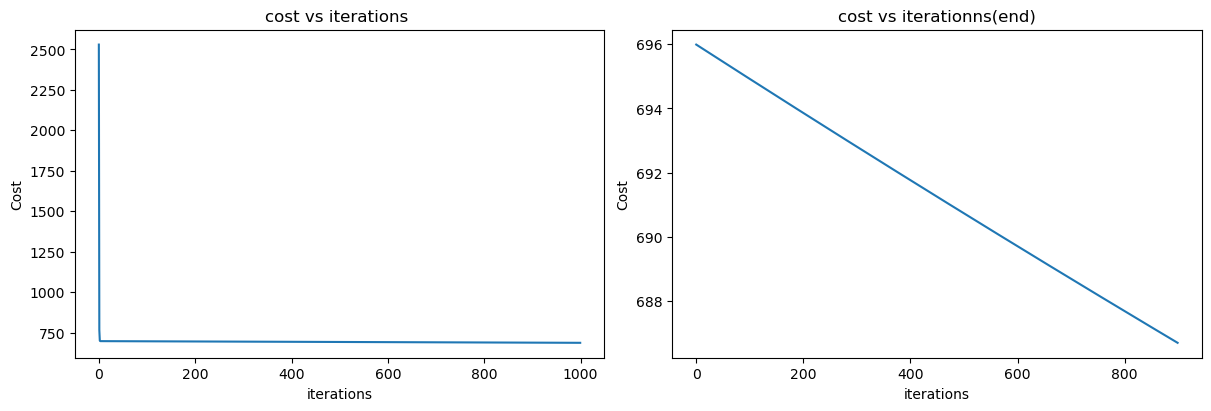

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(cost_hist)
ax2.plot(cost_hist[100:])
ax1.set_title("cost vs iterations "); ax2.set_title("cost vs iterationns(end)")
ax1.set_ylabel("Cost") ; ax1.set_xlabel("iterations")
ax2.set_ylabel("Cost") ; ax2.set_xlabel("iterations")
plt.show()


In [3]:
# tray sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import  LinearRegression

In [4]:
#first way  
sgdr=SGDRegressor(max_iter=100000)
sgdr.fit(x_train,y_train)

b = sgdr.intercept_
w = sgdr.coef_
print(f" b = {b}, w = {w}")

 b = [-4.01900938e+09], w = [-6.04768198e+11  3.37882112e+08 -8.62889125e+09 -1.20429037e+11]


In [19]:
y_pred=sgdr.predict(x_train)
print(f" y_train : \n {y_train}")
print(f" y_pred : \n {y_pred}")

 y_train : 
 [460 232 178]
 y_pred : 
 [-5.25432915e+14 -3.55028204e+14 -2.15186629e+14]


In [20]:
# seconed way
lm=LinearRegression()

lm.fit(x_train,y_train)
y_pred=lm.predict(x_train)
print(y_pred)

[460. 232. 178.]
